In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [6]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Print the scikit-learn version
import sklearn
sklearn.__version__

'0.21.3'

### Generating the data for KNN
- Generate values for class 0
    - Generate 50,x1 values within the range 0 to 50
    - Generate 50,x2 values within range 1 to 50
    - Create a 2d array with x1 values as 0th element and x2 values as 1st  element,3rd value is zero
    - o/p--[[2,5,0],[3,10,0],[24,12,0]]
- Generate values class 1
    - Generate 50,x1 values within the range 50 to 100
    - Generate 50,x2 values within range 1 to 50
    - Create a 2d array with x1 values as 0th element and x2 values as 1st  element,3rd element is one
- Create a 2d array which comsists both classes data
- Create a DataFrame from this data with added y column

In [8]:
np.random.seed(10)
x1 = np.random.randint(0,50,50)
x2 = np.random.randint(0,50,50)
x1,x2

(array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
        16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
        22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11]),
 array([28, 10, 24,  9, 15, 18, 16,  7, 24, 11, 17, 46,  7, 11, 28, 33, 20,
        32, 24, 44,  5,  4,  7, 24, 24, 44, 34, 40, 15, 13, 24, 15,  6, 21,
        42, 22, 11, 48, 12, 28, 32, 49, 15, 44, 40, 42, 45, 43, 33, 45]))

In [9]:
np.vstack((x1,x2))   #2d array

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [28, 10, 24,  9, 15, 18, 16,  7, 24, 11, 17, 46,  7, 11, 28, 33,
        20, 32, 24, 44,  5,  4,  7, 24, 24, 44, 34, 40, 15, 13, 24, 15,
         6, 21, 42, 22, 11, 48, 12, 28, 32, 49, 15, 44, 40, 42, 45, 43,
        33, 45]])

In [10]:
np.hstack((x1,x2))  #1d array

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 28,
       10, 24,  9, 15, 18, 16,  7, 24, 11, 17, 46,  7, 11, 28, 33, 20, 32,
       24, 44,  5,  4,  7, 24, 24, 44, 34, 40, 15, 13, 24, 15,  6, 21, 42,
       22, 11, 48, 12, 28, 32, 49, 15, 44, 40, 42, 45, 43, 33, 45])

In [12]:
x1_2d=np.expand_dims(x1,1)
x2_2d=np.expand_dims(x2,1)
y_2d=np.expand_dims(np.zeros(50,dtype=int),1)

In [17]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 28,  0],
       [36, 10,  0],
       [15, 24,  0],
       [ 0,  9,  0],
       [49, 15,  0],
       [28, 18,  0],
       [25, 16,  0],
       [29,  7,  0],
       [48, 24,  0],
       [29, 11,  0],
       [49, 17,  0],
       [ 8, 46,  0],
       [ 9,  7,  0],
       [ 0, 11,  0],
       [42, 28,  0],
       [40, 33,  0],
       [36, 20,  0],
       [16, 32,  0],
       [36, 24,  0],
       [47, 44,  0],
       [11,  5,  0],
       [24,  4,  0],
       [43,  7,  0],
       [33, 24,  0],
       [ 8, 24,  0],
       [36, 44,  0],
       [14, 34,  0],
       [49, 40,  0],
       [13, 15,  0],
       [ 5, 13,  0],
       [13, 24,  0],
       [25, 15,  0],
       [13,  6,  0],
       [28, 21,  0],
       [22, 42,  0],
       [30, 22,  0],
       [30, 11,  0],
       [25, 48,  0],
       [12, 12,  0],
       [ 1, 28,  0],
       [31, 32,  0],
       [36, 49,  0],
       [27, 15,  0],
       [18, 44,  0],
       [29, 40,  0],
       [13, 42,  0],
       [22, 45,  0],
       [23, 4

In [19]:
np.random.seed(15)
x1 = np.random.randint(50,100,50)
x2 = np.random.randint(1,50,50)
x1_2d=np.expand_dims(x1,1)
x2_2d=np.expand_dims(x2,1)
y_2d=np.expand_dims(np.zeros(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1

array([[58,  3,  0],
       [62, 43,  0],
       [55, 33,  0],
       [50, 38,  0],
       [78,  8,  0],
       [77, 25,  0],
       [57, 38,  0],
       [61, 46,  0],
       [71, 20,  0],
       [97, 49,  0],
       [79, 41,  0],
       [67, 30,  0],
       [95, 13,  0],
       [81, 25,  0],
       [73, 47,  0],
       [82, 13,  0],
       [60, 34,  0],
       [65,  3,  0],
       [54, 25,  0],
       [91, 45,  0],
       [89, 43,  0],
       [87, 18,  0],
       [69, 24,  0],
       [94, 30,  0],
       [63, 35,  0],
       [79, 24,  0],
       [65, 19,  0],
       [88, 27,  0],
       [65, 27,  0],
       [99, 17,  0],
       [51, 14,  0],
       [81, 27,  0],
       [82, 33,  0],
       [71,  7,  0],
       [76,  5,  0],
       [84, 29,  0],
       [61, 21,  0],
       [51, 36,  0],
       [90, 40,  0],
       [56, 29,  0],
       [91,  6,  0],
       [84,  1,  0],
       [90, 10,  0],
       [72, 49,  0],
       [90, 21,  0],
       [65, 47,  0],
       [78, 39,  0],
       [85, 3

In [21]:
data=np.vstack((d0,d1))
data

array([[ 9, 28,  0],
       [36, 10,  0],
       [15, 24,  0],
       [ 0,  9,  0],
       [49, 15,  0],
       [28, 18,  0],
       [25, 16,  0],
       [29,  7,  0],
       [48, 24,  0],
       [29, 11,  0],
       [49, 17,  0],
       [ 8, 46,  0],
       [ 9,  7,  0],
       [ 0, 11,  0],
       [42, 28,  0],
       [40, 33,  0],
       [36, 20,  0],
       [16, 32,  0],
       [36, 24,  0],
       [47, 44,  0],
       [11,  5,  0],
       [24,  4,  0],
       [43,  7,  0],
       [33, 24,  0],
       [ 8, 24,  0],
       [36, 44,  0],
       [14, 34,  0],
       [49, 40,  0],
       [13, 15,  0],
       [ 5, 13,  0],
       [13, 24,  0],
       [25, 15,  0],
       [13,  6,  0],
       [28, 21,  0],
       [22, 42,  0],
       [30, 22,  0],
       [30, 11,  0],
       [25, 48,  0],
       [12, 12,  0],
       [ 1, 28,  0],
       [31, 32,  0],
       [36, 49,  0],
       [27, 15,  0],
       [18, 44,  0],
       [29, 40,  0],
       [13, 42,  0],
       [22, 45,  0],
       [23, 4

In [32]:
df=pd.DataFrame(data,columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,9,28,0
1,36,10,0
2,15,24,0
3,0,9,0
4,49,15,0


In [86]:
df.to_csv("knn.csv")

### Scatter plot for the randomly generated data clockwise

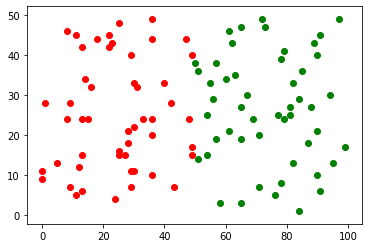

In [29]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [33]:
df['x2'][:50]

0     28
1     10
2     24
3      9
4     15
5     18
6     16
7      7
8     24
9     11
10    17
11    46
12     7
13    11
14    28
15    33
16    20
17    32
18    24
19    44
20     5
21     4
22     7
23    24
24    24
25    44
26    34
27    40
28    15
29    13
30    24
31    15
32     6
33    21
34    42
35    22
36    11
37    48
38    12
39    28
40    32
41    49
42    15
43    44
44    40
45    42
46    45
47    43
48    33
49    45
Name: x2, dtype: int32

In [35]:
df['x2'][50:]

50     3
51    43
52    33
53    38
54     8
55    25
56    38
57    46
58    20
59    49
60    41
61    30
62    13
63    25
64    47
65    13
66    34
67     3
68    25
69    45
70    43
71    18
72    24
73    30
74    35
75    24
76    19
77    27
78    27
79    17
80    14
81    27
82    33
83     7
84     5
85    29
86    21
87    36
88    40
89    29
90     6
91     1
92    10
93    49
94    21
95    47
96    39
97    36
98    15
99    19
Name: x2, dtype: int32

### Seperate the features and outcomes

In [36]:
outcome=df['y']
features=df[['x1','x2']]
# features=df.drop('y',axis=1)
outcome[0],features.iloc[0]

(0, x1     9
 x2    28
 Name: 0, dtype: int32)

In [37]:
import math

In [38]:
def Eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [40]:
Eucledian_distance((4,3),(0,0))

5.0

In [80]:
def knearest_points(p,d,k):
    '''p - new data point
    d - all the features as numpy array
    k - no of neighbors
    returns the k nearest neighbors'''
    # create an empty list to store distances
    distances=[]
    for row in d:
        distances.append(Eucledian_distance(row,p))
        # convert the list to numpy array
    distances=np.array(distances)
        # sort the numpy arrat get the indices based on sorted
        # values
        # use the indices to get the k nearest neighbors
    return distances.argsort()[:k]

In [71]:
l=[45,67,45,78,43]
l=np.array(l)
l.argsort()

array([4, 0, 2, 1, 3], dtype=int64)

In [64]:
for row in features.values:
    print(row)
    break

[ 9 28]


In [72]:
near_4=knearest_points((5,34),features.values,4)

In [73]:
near_4[:,0]

array([ 9,  1, 14,  8])

In [69]:
knearest_points((5,34),features.values,4)

array([[ 9, 28],
       [ 1, 28],
       [14, 34],
       [ 8, 24]])

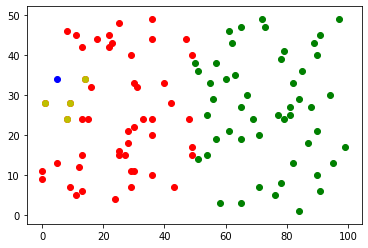

In [74]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(5,34,'bo')
plt.scatter(near_4[:,0],near_4[:,1],color='y')

In [81]:
ind=near_4=knearest_points((47,25),features.values,10)
features.values[ind]
outcome[ind]
outcome[ind].value_counts()
outcome[ind].value_counts().index[0]

0

In [77]:
ind=near_4=knearest_points((47,25),features.values,10)


In [78]:
features.values[ind]


array([[[30, 33],
        [ 8, 24]],

       [[27, 15],
        [13, 15]],

       [[78,  8],
        [36, 44]],

       [[11, 45],
        [16, 32]],

       [[57, 38],
        [ 5, 13]],

       [[11, 45],
        [40, 33]],

       [[31, 32],
        [28, 21]],

       [[30, 11],
        [ 8, 24]],

       [[77, 25],
        [28, 21]],

       [[61, 46],
        [47, 44]]])

In [82]:
outcome[ind]


8     0
14    0
68    0
10    0
89    0
4     0
15    0
18    0
52    0
99    0
Name: y, dtype: int32

In [83]:
def output(p,k,features,outcome):
    ind=knearest_points(p,features.values,k)
    return outcome[ind].value_counts().index[0]
output((34,49),10,features,outcome)

0

In [84]:
for i,feature in features.iterrows():
    print(feature)
    break

x1     9
x2    28
Name: 0, dtype: int32


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("knn.csv")
data.head(4)

,Unnamed: 0,x1,x2,y
0,0,9,28,0
1,1,36,10,0
2,2,15,24,0
3,3,0,9,0


In [94]:
data=pd.read_csv("knn.csv")
#data.columns
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(4)

,x1,x2,y
0,9,28,0
1,36,10,0
2,15,24,0
3,0,9,0


In [99]:
# Seperate features and target
features=data[['x1','x2']]
target=data['y']

#### KNN Classifier
- Fit --> Store the features and target
- Predict
    - prediction multiple points
    - run a loop for point by point
        - calculate the nearest neighbors indices
        - get the outcomes of the nearest neighbors
        - predict the output based on neighbors class

In [100]:
def fit(features,target):
    return features,target

In [101]:
class knn():
    def__init__(self,distance='L2'):
        self.distance=distance
    def fit(self,features,target):
        self.features=features
        self.target=target
    def eucledian_distance(self,p1,p2):
        np. 
def predict(test):
    # test - data observations to predict outcomes
    # test is a DataFrame
    for _,feature in test.iterrows(): 

SyntaxError: unexpected EOF while parsing (<ipython-input-101-21de7c89b0d2>, line 4)